<a href="https://colab.research.google.com/github/shagunsingh30/ML/blob/main/Phishing_Website_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import files
import math
from google.colab import drive 
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
path="/content/drive/MyDrive/practice datasets/Phishing_Legitimate_full.csv"
df=pd.read_csv(path)
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [54]:
# df['Target']=df['CLASS_LABEL']
df.isna().sum()#no null and nan fields are present 
df.isnull().sum().sum()

0

In [52]:
y=df['Target']
x=df.drop(['Target'],axis=1)
x.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,1,-1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,4,3,1,6,79,1,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,5,3,0,4,46,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=45) #splitting the data-set for training and testing. 

#Training using decision tree Classifier.

In [8]:
cart=DecisionTreeClassifier()
cart.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
# printing the accuracy score of the classifier model by comparing the test target values and predicted target values. 
y_pred=cart.predict(x_test)  
print("Accuracy of Decision Tree Classifier:",(100*accuracy_score(y_test,y_pred))) 

Accuracy of Decision Tree Classifier: 100.0


# CONFUSION MATRIX FOR THE MODEL (DECISION TREE CLASSIFIER).
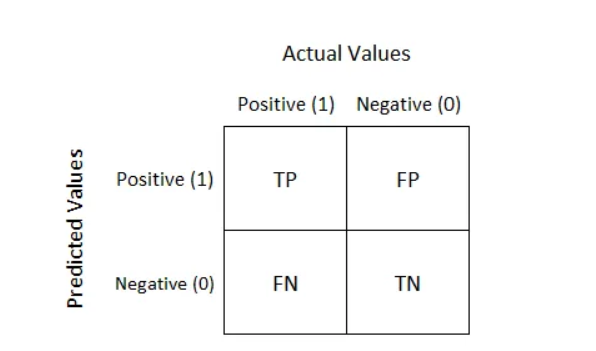

In [10]:
a=confusion_matrix(y_test,y_pred)
print(f"True Positive: {a[0][0]}",end="  ")
print(f"False Positive: {a[0][1]}",end=" ")
print(f"\nFalse Negative: {a[1][0]}",end="  ")
print(f"True Negative: {a[1][1]}",end=" ")

True Positive: 1988  False Positive: 0 
False Negative: 0  True Negative: 2012 

#CLASSIFICATION REPORT OF THE DECISION TREE CLASSIFIER

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



#Training the model using Logistic regression

In [12]:
#splitting the data-set for training and testing. 
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.4,random_state=25) 

In [13]:
Log_reg=LogisticRegression(max_iter=5000)
Log_reg.fit(x1_train,y1_train)
y1_pred=Log_reg.predict(x1_test)
print("Accuracy score for Logistic Regression Model:",100*accuracy_score(y1_test,y1_pred))

Accuracy score for Logistic Regression Model: 99.625


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#CLASSIFICATION REPORT FOR LOGISTIC REGRESSION.

In [55]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2020
           1       0.99      1.00      1.00      1980

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

